In [2]:
import pandas as pd
import os

DATASET_DIR = "../datasets"

files = [
    "ml_ev_charging_dataset.csv",
    "charger_info_mel.csv",
    "clustered_suburbs.csv",
    "Co-oridnates.csv",
    "Info_for_PCZ.csv",
    "optimal_prices_all_suburbs.csv",
    "road_congestion.csv",
    "stations_per_town.csv",
    "Suburb_Population.csv",
    "vehicle_registrations.csv"
]

for file in files:
    path = os.path.join(DATASET_DIR, file)
    df = pd.read_csv(path)
    print(f"{file:<30} | Rows: {df.shape[0]:<6} | Cols: {df.shape[1]:<4}")


ml_ev_charging_dataset.csv     | Rows: 558    | Cols: 9   
charger_info_mel.csv           | Rows: 262    | Cols: 11  
clustered_suburbs.csv          | Rows: 349    | Cols: 16  
Co-oridnates.csv               | Rows: 198    | Cols: 4   
Info_for_PCZ.csv               | Rows: 350    | Cols: 4   
optimal_prices_all_suburbs.csv | Rows: 124    | Cols: 4   
road_congestion.csv            | Rows: 4706   | Cols: 105 
stations_per_town.csv          | Rows: 197    | Cols: 3   
Suburb_Population.csv          | Rows: 350    | Cols: 2   
vehicle_registrations.csv      | Rows: 594    | Cols: 7   


In [3]:
DATASET_DIR = "../datasets"
main_file = "ml_ev_charging_dataset.csv"

path = os.path.join(DATASET_DIR, main_file)
df = pd.read_csv(path)

df.head()


,Timestamp,Station_Name,Longitude,Latitude,Address,Distance_km,ETA_min,Suburb_Location_Lat,Suburb_Location_Lon
0,2025-04-18T16:14:12.396724,bp pulse,144.898079,-37.534418,"470 Donnybrook Road, Melbourne, VIC, 3064",10.55,14.97,-37.544234,145.007641
1,2025-04-18T16:14:14.253085,JOLT,145.041063,-37.948561,"493A Highett Road, Melbourne, VIC, 3190",4.75,8.03,-37.970656,145.021282
2,2025-04-18T16:14:16.642498,ChargeFox,145.111046,-37.844412,"7 Uganda Street, Melbourne, VIC, 3125",0.89,1.58,-37.837435,145.111535
3,2025-04-18T16:14:17.908642,Evie,144.572248,-37.722813,"201 Exford Road, Weir Views, VIC, 3338",10.99,12.88,-37.791706,144.549485
4,2025-04-18T16:14:20.672654,ChargeFox,145.279866,-37.796920,"4-16 Devon Street, Melbourne, VIC, 3136",1.95,4.40,-37.795500,145.280151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            558 non-null    object 
 1   Station_Name         558 non-null    object 
 2   Longitude            558 non-null    float64
 3   Latitude             558 non-null    float64
 4   Address              558 non-null    object 
 5   Distance_km          558 non-null    float64
 6   ETA_min              558 non-null    float64
 7   Suburb_Location_Lat  558 non-null    float64
 8   Suburb_Location_Lon  558 non-null    float64
dtypes: float64(6), object(3)
memory usage: 39.4+ KB


In [5]:
df.describe()

,Longitude,Latitude,Distance_km,ETA_min,Suburb_Location_Lat,Suburb_Location_Lon
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,144.984765,-37.814579,4.138118,7.554695,-37.815447,144.985235
std,0.215296,0.156561,3.336779,3.918118,0.158701,0.222880
min,144.572248,-38.371404,0.260000,1.500000,-38.382168,144.540666
25%,144.827103,-37.906279,1.690000,4.520000,-37.904763,144.829464
50%,144.998697,-37.794921,2.955000,6.720000,-37.798344,145.019304
75%,145.134114,-37.713652,5.540000,9.870000,-37.709258,145.130126
max,145.613177,-37.510615,14.470000,21.000000,-37.492745,145.615026


In [6]:
missing_pct = df.isna().sum() / len(df) * 100
missing_pct = missing_pct.sort_values(ascending=False)

missing_pct

Timestamp              0.0
Station_Name           0.0
Longitude              0.0
Latitude               0.0
Address                0.0
Distance_km            0.0
ETA_min                0.0
Suburb_Location_Lat    0.0
Suburb_Location_Lon    0.0
dtype: float64

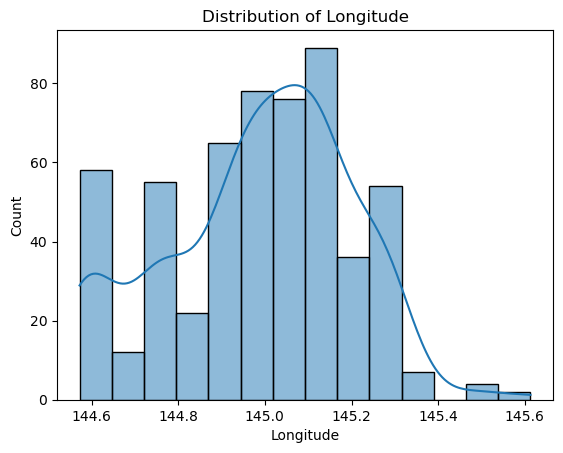

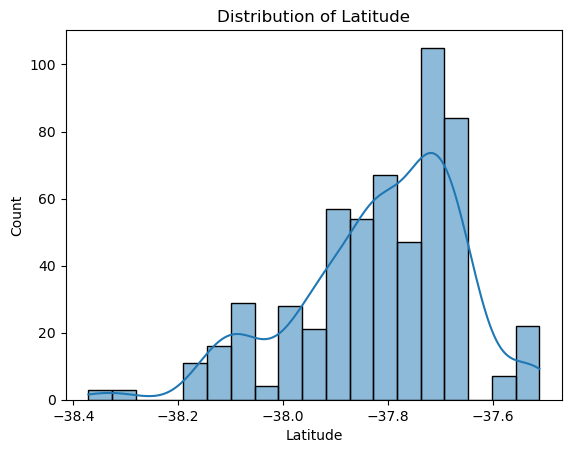

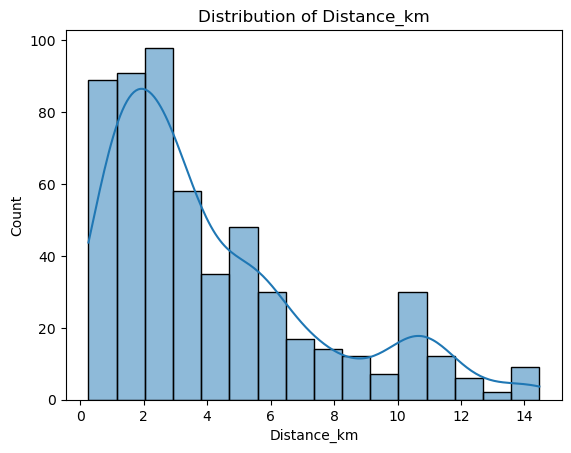

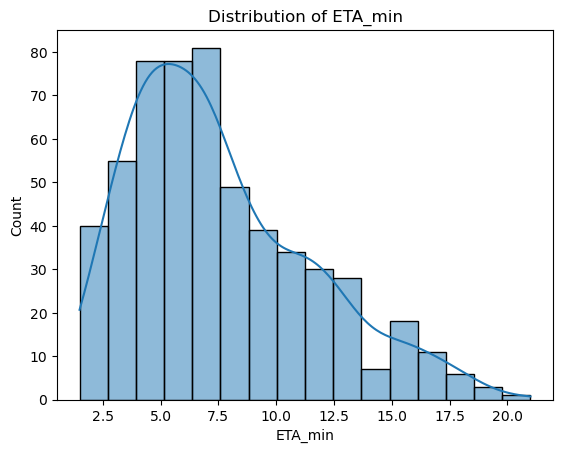

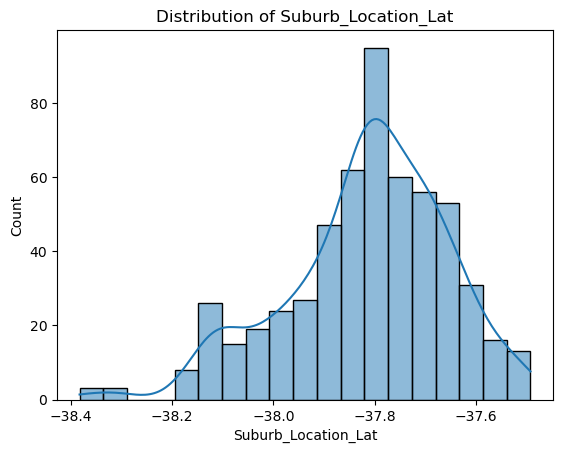

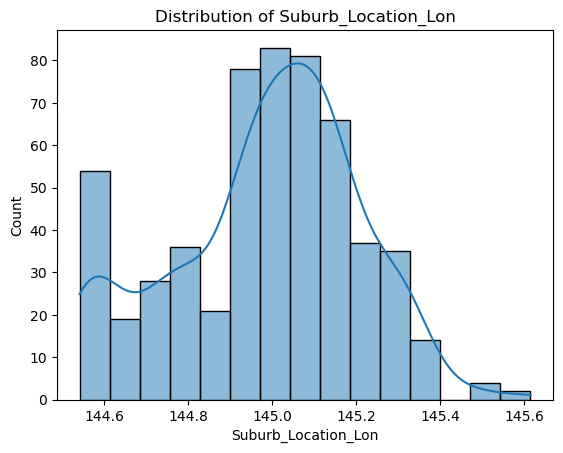

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numeric columns
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


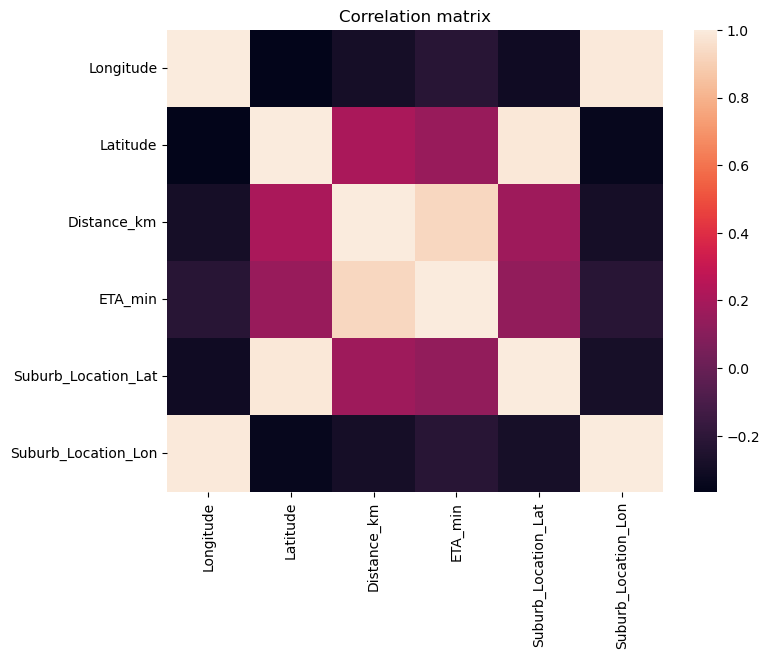

In [8]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False)
plt.title("Correlation matrix")
plt.show()


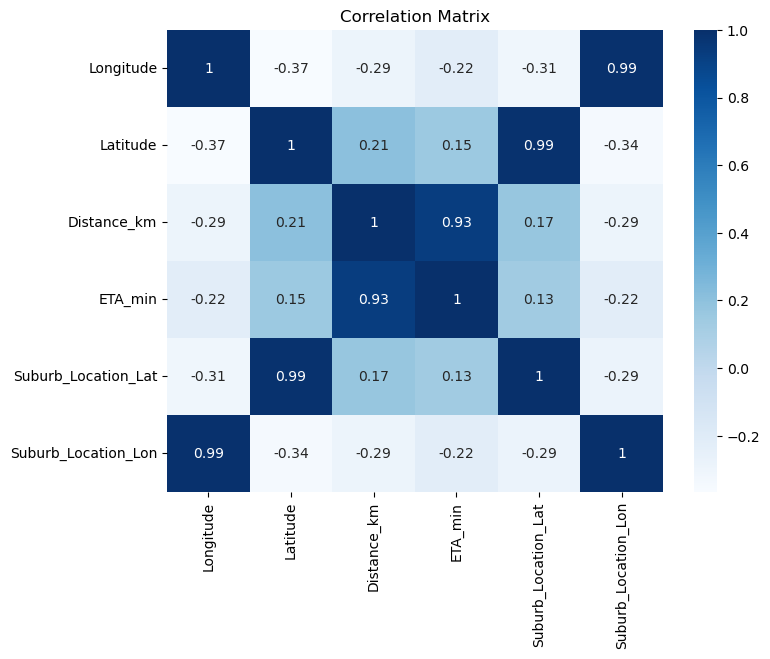

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()


In [10]:
df.duplicated().sum()

np.int64(0)

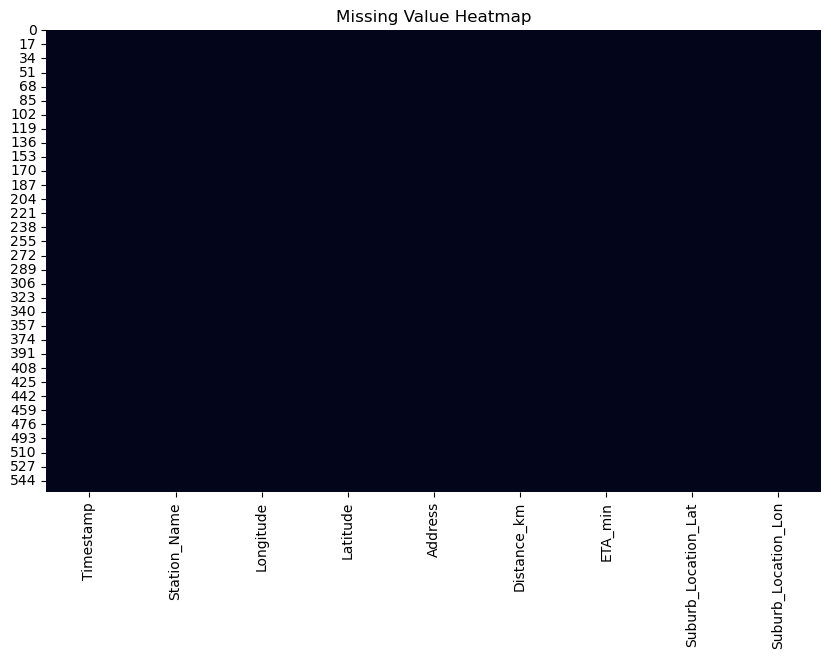

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


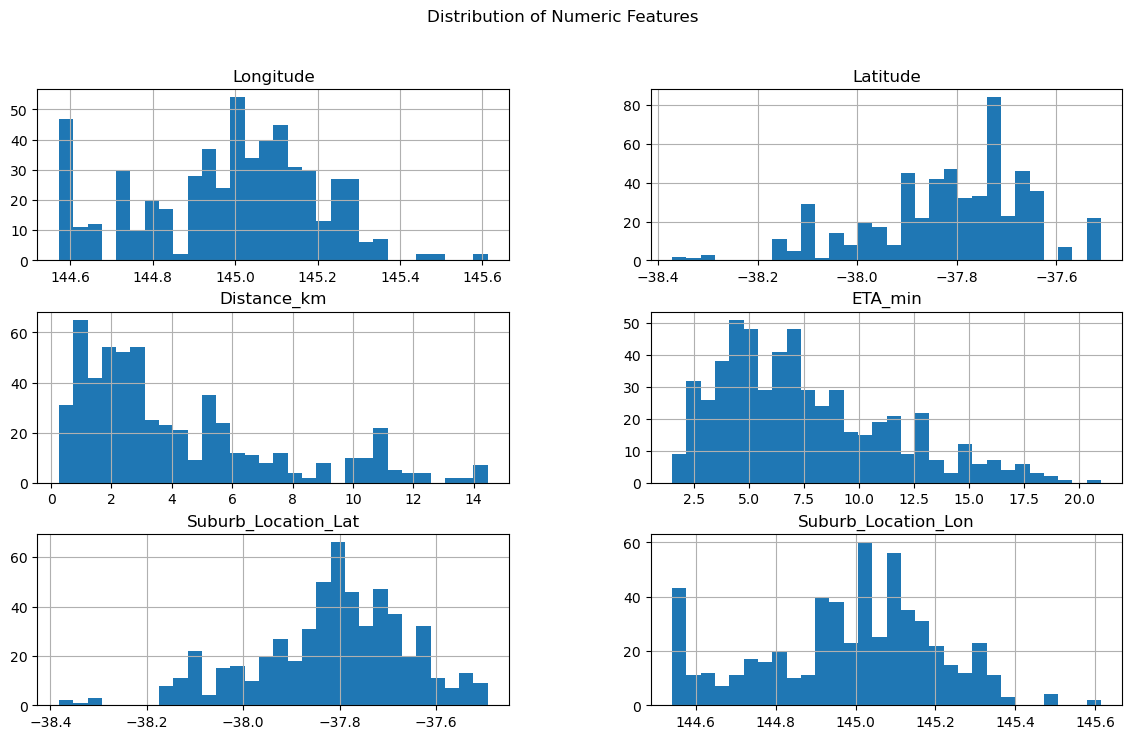

In [11]:
df.hist(figsize=(14,8), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

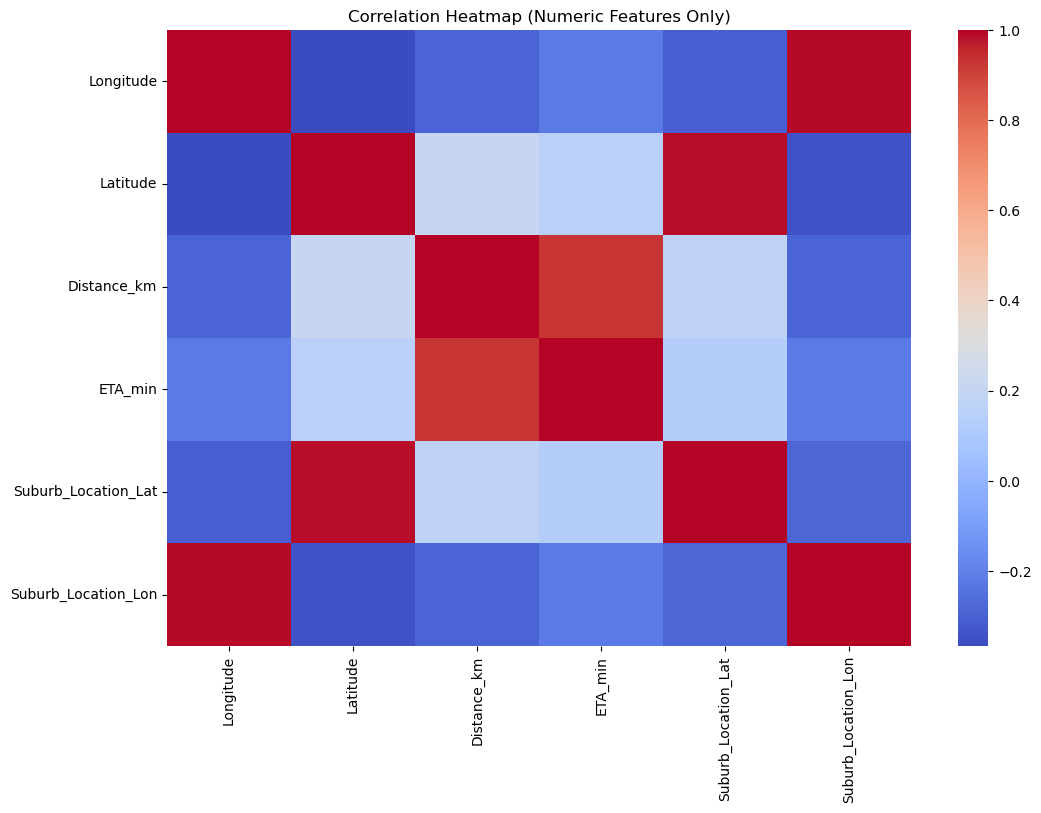

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numeric columns

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

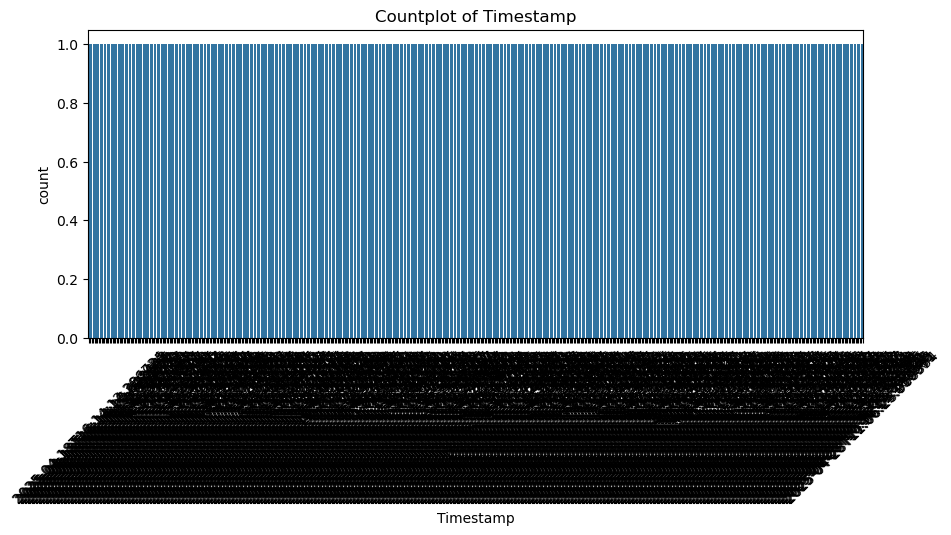

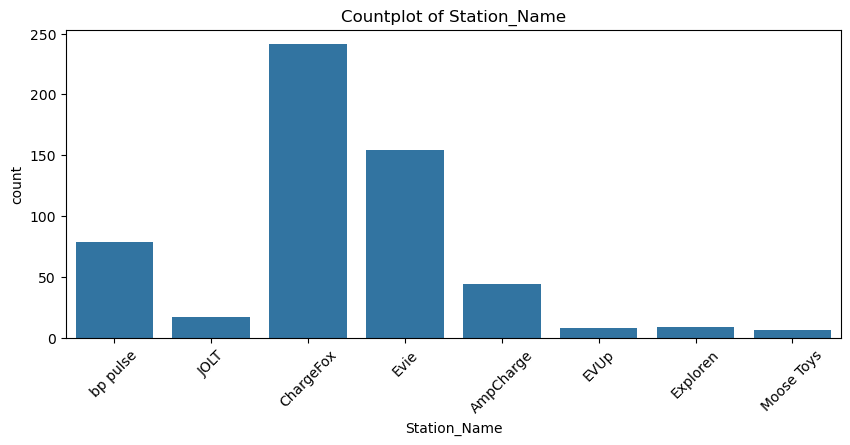

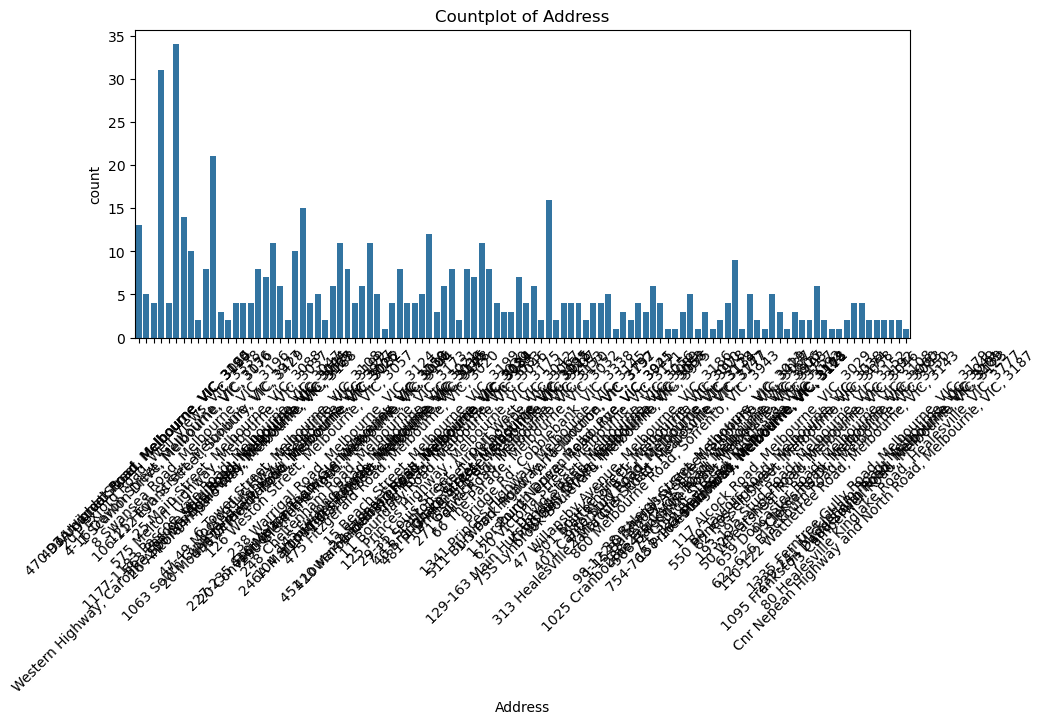

In [16]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    plt.show()
